# TP Assane DIALLO

## Import les bibliothèques nécessaires

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score

## Clustering

### Étape 1: Chargement des données

In [172]:
data = pd.read_csv("./data/CeriseVsApricot.csv", sep=";")

# Réaliser des stats descriptives
print("Statistiques descriptives:")
print(data.describe())

Statistiques descriptives:
         diameter      weight
count  400.000000  400.000000
mean    35.168675   32.689875
std     12.757083   31.083175
min     17.030000    1.090000
25%     24.120000    7.165000
50%     31.975000   17.995000
75%     46.552500   53.245000
max     58.920000  109.910000


### Étape 2: Visualisation des données

#### Histogrammes

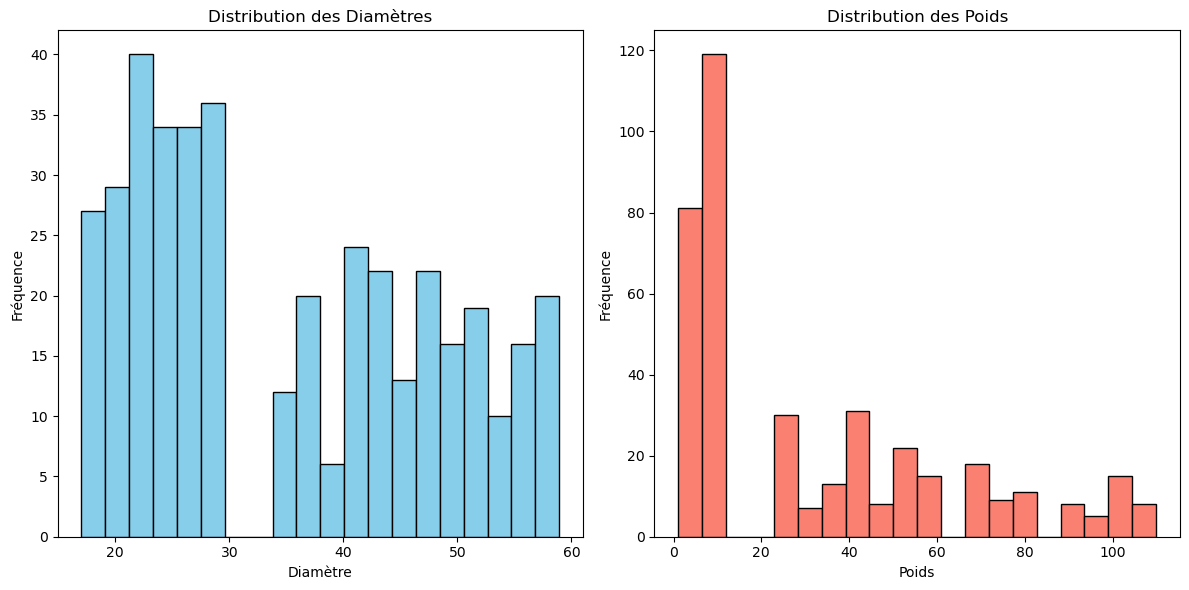

In [173]:
# histogrammes pour visualiser la distribution des diamètres et des poids. 
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(data["diameter"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Diamètre")
plt.ylabel("Fréquence")
plt.title("Distribution des Diamètres")

plt.subplot(122)
plt.hist(data["weight"], bins=20, color='salmon', edgecolor='black')
plt.xlabel("Poids")
plt.ylabel("Fréquence")
plt.title("Distribution des Poids")

plt.tight_layout()
plt.show()

#### Diagramme de dispersion :

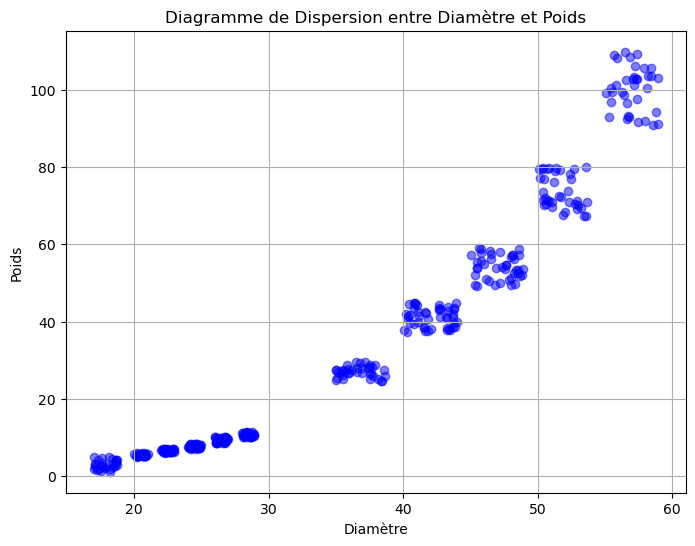

In [174]:
# Un diagramme de dispersion pour visualiser la relation entre le diamètre et le poids.
plt.figure(figsize=(8, 6))
plt.scatter(data["diameter"], data["weight"], c='blue', alpha=0.5)
plt.xlabel("Diamètre")
plt.ylabel("Poids")
plt.title("Diagramme de Dispersion entre Diamètre et Poids")
plt.grid(True)
plt.show()

#### Boîte à moustaches (Boxplot) :

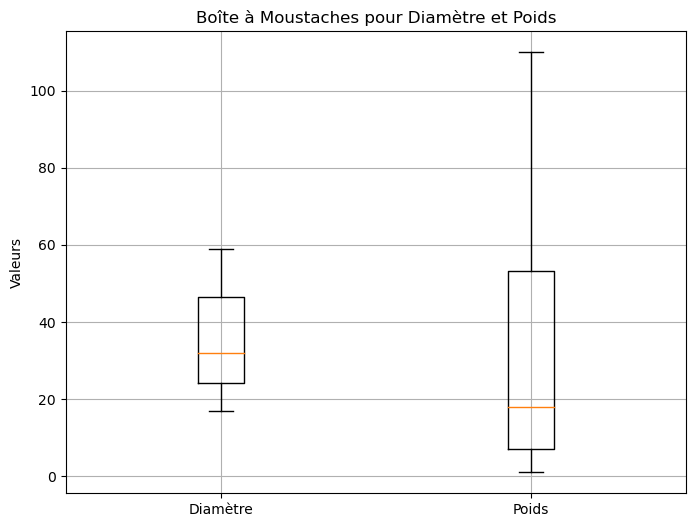

In [175]:
# Les boîtes à moustaches montreront la médiane, les quartiles et les valeurs aberrantes dans les données.
plt.figure(figsize=(8, 6))
plt.boxplot([data["diameter"], data["weight"]], labels=["Diamètre", "Poids"])
plt.ylabel("Valeurs")
plt.title("Boîte à Moustaches pour Diamètre et Poids")
plt.grid(True)
plt.show()

### Étape 3: Centrer et réduire les variables

In [176]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### Étape 4: Réaliser la classification avec K-Means

#### Sur les données non transformées

In [177]:
k = 3

kmeans_raw = KMeans(n_clusters=k, random_state=42)
data["cluster_raw"] = kmeans_raw.fit_predict(data)

/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Sur les données transformées

In [178]:
k = 3

kmeans_scaled = KMeans(n_clusters=k, random_state=42)
data["cluster_scaled"] = kmeans_scaled.fit_predict(scaled_data)

/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Étape 5: Déterminer le nombre adéquat de groupes via la méthode du coude

/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/assane/an

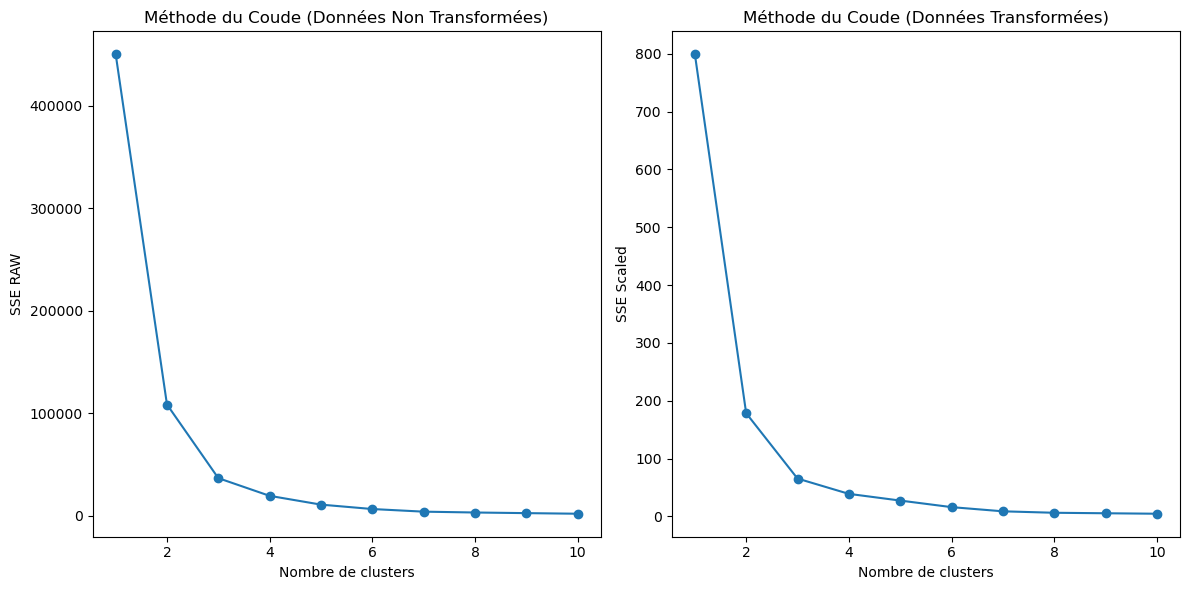

In [179]:
sse_raw = []
sse_scaled = []
for k in range(1, 11):
    kmeans_raw = KMeans(n_clusters=k, random_state=42)
    kmeans_raw.fit(data[["diameter", "weight"]])
    sse_raw.append(kmeans_raw.inertia_)

    kmeans_scaled = KMeans(n_clusters=k, random_state=42)
    kmeans_scaled.fit(scaled_data)
    sse_scaled.append(kmeans_scaled.inertia_)

# Créer une figure avec deux sous-graphiques côte à côte
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Tracer le graphique de la méthode du coude pour les données non transformées
axs[0].plot(range(1, 11), sse_raw, marker='o')
axs[0].set_xlabel('Nombre de clusters')
axs[0].set_ylabel('SSE RAW')
axs[0].set_title('Méthode du Coude (Données Non Transformées)')

# Tracer le graphique de la méthode du coude pour les données transformées
axs[1].plot(range(1, 11), sse_scaled, marker='o')
axs[1].set_xlabel('Nombre de clusters')
axs[1].set_ylabel('SSE Scaled')
axs[1].set_title('Méthode du Coude (Données Transformées)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### Étape 6: Visualiser les données avec les clusters

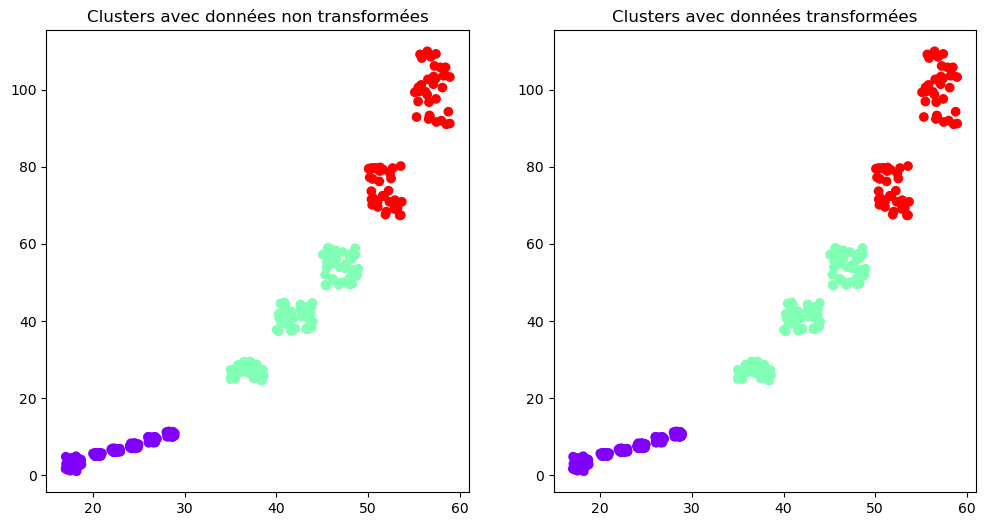

In [180]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(data["diameter"], data["weight"], c=data["cluster_raw"], cmap='rainbow')
plt.title("Clusters avec données non transformées")

plt.subplot(122)
plt.scatter(data["diameter"], data["weight"], c=data["cluster_scaled"], cmap='rainbow')
plt.title("Clusters avec données transformées")
plt.show()

### Étape 7: Interpréter les classes via des stats descriptives comparatives

In [181]:
cluster_stats = data.groupby("cluster_raw")[["diameter", "weight"]].mean()
print("Moyenne du DIAMÈTRE et POIDS par cluster (données non transformées):")
print(cluster_stats)

Moyenne du DIAMÈTRE et POIDS par cluster (données non transformées):
              diameter     weight
cluster_raw                      
0            23.683500   7.277650
1            42.179444  41.316190
2            54.272432  86.683514


### Étape 8: Comparer les modèles K-Means

In [182]:
silhouette_raw = silhouette_score(data[["diameter", "weight"]], data["cluster_raw"])
silhouette_scaled = silhouette_score(scaled_data, data["cluster_scaled"])

print(f"Silhouette Score (données non transformées): {silhouette_raw*100:.2f}%")
print(f"Silhouette Score (données transformées): {silhouette_scaled*100:.2f}%")

# Comparer les scores de silhouette
if silhouette_scaled > silhouette_raw:
    best_model = "K-Means sur données transformées (scaled)"
else:
    best_model = "K-Means sur données non transformées"

print(f"\nLe modèle qui permet de classifier le mieux les observations est donc : {best_model} 👍🏽")

Silhouette Score (données non transformées): 71.98%
Silhouette Score (données transformées): 70.11%

Le modèle qui permet de classifier le mieux les observations est donc : K-Means sur données non transformées 👍🏽


### Étape 9: Fonction pour prédire la classe d'une observation

In [183]:
def predict_class(observation, model):
    scaled_observation = scaler.transform([observation])
    cluster = model.predict(scaled_observation)
    return cluster[0]

In [184]:
# Prédire la classe des observations spécifiées
observation_cerise = [26.98, 8.75]
observation_abricot = [55.7, 102.16]

predicted_class_cerise_raw = predict_class(observation_cerise, kmeans_raw)
predicted_class_abricot_raw = predict_class(observation_abricot, kmeans_raw)
predicted_class_cerise_scaled = predict_class(observation_cerise, kmeans_scaled)
predicted_class_abricot_scaled = predict_class(observation_abricot, kmeans_scaled)

print(f"Prédiction pour l'observation de cerise (données non transformées): Cluster {predicted_class_cerise_raw}")
print(f"Prédiction pour l'observation d'abricot (données non transformées): Cluster {predicted_class_abricot_raw}")
print(f"Prédiction pour l'observation de cerise (données transformées): Cluster {predicted_class_cerise_scaled}")
print(f"Prédiction pour l'observation d'abricot (données transformées): Cluster {predicted_class_abricot_scaled}")

Prédiction pour l'observation de cerise (données non transformées): Cluster 6
Prédiction pour l'observation d'abricot (données non transformées): Cluster 6
Prédiction pour l'observation de cerise (données transformées): Cluster 4
Prédiction pour l'observation d'abricot (données transformées): Cluster 7


/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/base.

## Retourner le Pb du Titanic

## 1. Lire le jeu de données titanic.csv

### Chargement et stats

In [185]:
data = pd.read_csv("./data/titanic.csv")

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Nettoyage des données

In [186]:
# suppression des colonnes qui ne seront pas utilisées
data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [187]:
# Remplacer les valeurs manquantes de l'âge par la moyenne
data["Age"].fillna(data["Age"].mean(), inplace=True)
# Remplacer les valeurs manquantes du port d'embarquement par "Unknown"
data["Embarked"].fillna("Unknown", inplace=True)

data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 2. Décrire et représenter graphiquement chaque colonne

### Variables quantitatives

In [188]:
quantitative_vars = data.describe()
print(quantitative_vars)

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### Variables qualitatives

--- Survived ---
0: 549 (61.62%)
1: 342 (38.38%)


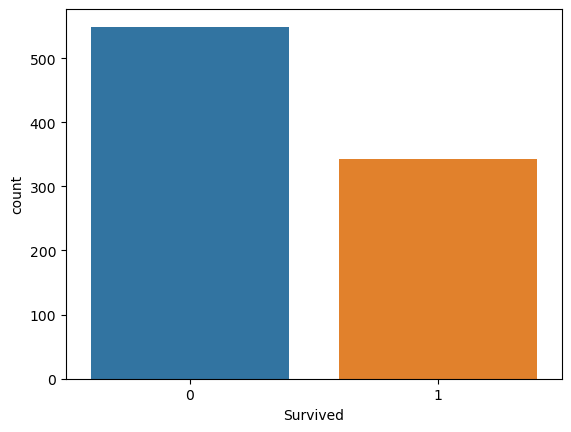

--- Pclass ---
3: 491 (55.11%)
1: 216 (24.24%)
2: 184 (20.65%)


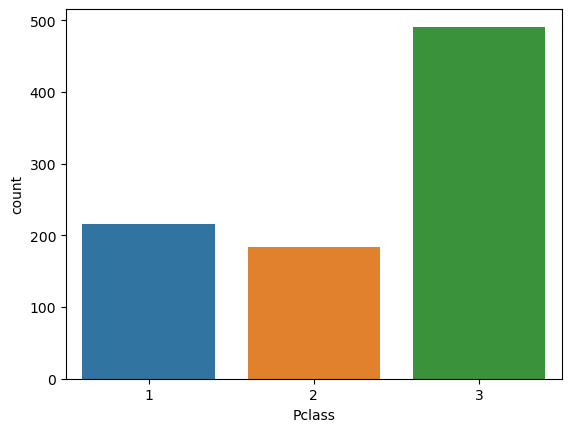

--- Sex ---
male: 577 (64.76%)
female: 314 (35.24%)


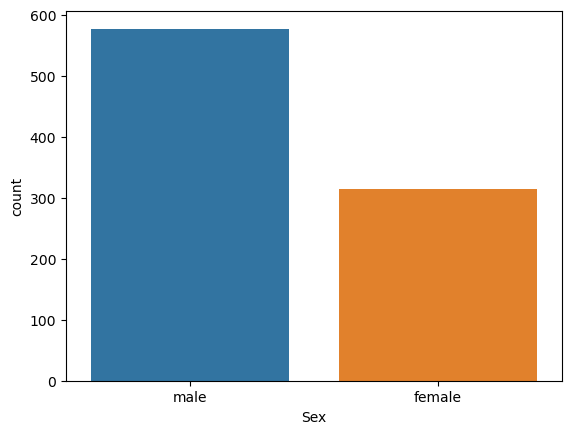

--- Age ---
29.69911764705882: 177 (19.87%)
24.0: 30 (3.37%)
22.0: 27 (3.03%)
18.0: 26 (2.92%)
28.0: 25 (2.81%)
30.0: 25 (2.81%)
19.0: 25 (2.81%)
21.0: 24 (2.69%)
25.0: 23 (2.58%)
36.0: 22 (2.47%)
29.0: 20 (2.24%)
35.0: 18 (2.02%)
32.0: 18 (2.02%)
26.0: 18 (2.02%)
27.0: 18 (2.02%)
31.0: 17 (1.91%)
16.0: 17 (1.91%)
34.0: 15 (1.68%)
20.0: 15 (1.68%)
23.0: 15 (1.68%)
33.0: 15 (1.68%)
39.0: 14 (1.57%)
40.0: 13 (1.46%)
17.0: 13 (1.46%)
42.0: 13 (1.46%)
45.0: 12 (1.35%)
38.0: 11 (1.23%)
4.0: 10 (1.12%)
2.0: 10 (1.12%)
50.0: 10 (1.12%)
44.0: 9 (1.01%)
47.0: 9 (1.01%)
48.0: 9 (1.01%)
54.0: 8 (0.90%)
9.0: 8 (0.90%)
1.0: 7 (0.79%)
51.0: 7 (0.79%)
37.0: 6 (0.67%)
52.0: 6 (0.67%)
41.0: 6 (0.67%)
3.0: 6 (0.67%)
14.0: 6 (0.67%)
49.0: 6 (0.67%)
58.0: 5 (0.56%)
15.0: 5 (0.56%)
43.0: 5 (0.56%)
62.0: 4 (0.45%)
56.0: 4 (0.45%)
8.0: 4 (0.45%)
60.0: 4 (0.45%)
11.0: 4 (0.45%)
5.0: 4 (0.45%)
6.0: 3 (0.34%)
7.0: 3 (0.34%)
65.0: 3 (0.34%)
61.0: 3 (0.34%)
46.0: 3 (0.34%)
10.0: 2 (0.22%)
64.0: 2 (0.22%)
13.0: 2 

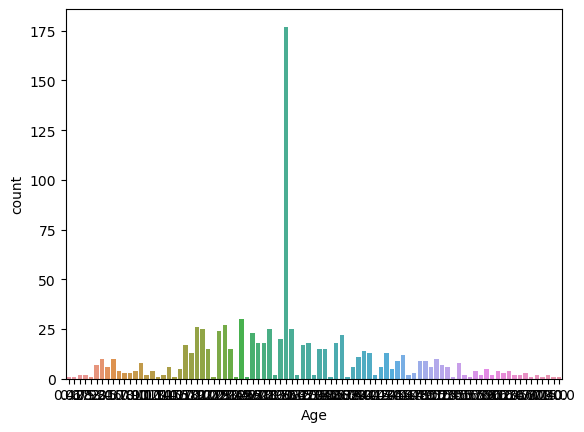

--- SibSp ---
0: 608 (68.24%)
1: 209 (23.46%)
2: 28 (3.14%)
4: 18 (2.02%)
3: 16 (1.80%)
8: 7 (0.79%)
5: 5 (0.56%)


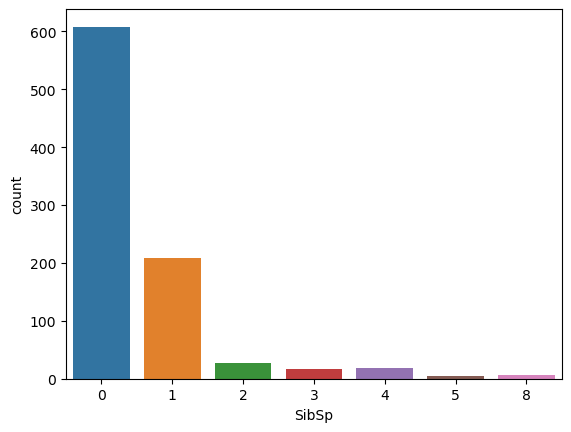

--- Parch ---
0: 678 (76.09%)
1: 118 (13.24%)
2: 80 (8.98%)
5: 5 (0.56%)
3: 5 (0.56%)
4: 4 (0.45%)
6: 1 (0.11%)


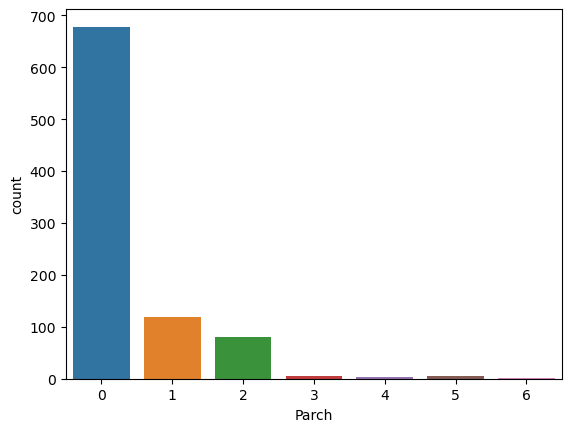

--- Fare ---
8.05: 43 (4.83%)
13.0: 42 (4.71%)
7.8958: 38 (4.26%)
7.75: 34 (3.82%)
26.0: 31 (3.48%)
10.5: 24 (2.69%)
7.925: 18 (2.02%)
7.775: 16 (1.80%)
7.2292: 15 (1.68%)
0.0: 15 (1.68%)
26.55: 15 (1.68%)
7.8542: 13 (1.46%)
8.6625: 13 (1.46%)
7.25: 13 (1.46%)
7.225: 12 (1.35%)
9.5: 9 (1.01%)
16.1: 9 (1.01%)
24.15: 8 (0.90%)
15.5: 8 (0.90%)
14.4542: 7 (0.79%)
69.55: 7 (0.79%)
52.0: 7 (0.79%)
7.05: 7 (0.79%)
56.4958: 7 (0.79%)
14.5: 7 (0.79%)
31.275: 7 (0.79%)
39.6875: 6 (0.67%)
7.7958: 6 (0.67%)
27.9: 6 (0.67%)
30.0: 6 (0.67%)
46.9: 6 (0.67%)
26.25: 6 (0.67%)
21.0: 6 (0.67%)
27.7208: 5 (0.56%)
29.125: 5 (0.56%)
15.2458: 5 (0.56%)
73.5: 5 (0.56%)
30.5: 5 (0.56%)
53.1: 5 (0.56%)
39.0: 4 (0.45%)
90.0: 4 (0.45%)
15.85: 4 (0.45%)
13.5: 4 (0.45%)
7.55: 4 (0.45%)
23.0: 4 (0.45%)
12.475: 4 (0.45%)
25.4667: 4 (0.45%)
7.125: 4 (0.45%)
7.65: 4 (0.45%)
21.075: 4 (0.45%)
7.7333: 4 (0.45%)
11.5: 4 (0.45%)
34.375: 4 (0.45%)
7.8792: 4 (0.45%)
19.2583: 4 (0.45%)
227.525: 4 (0.45%)
27.75: 4 (0.45%)
263.

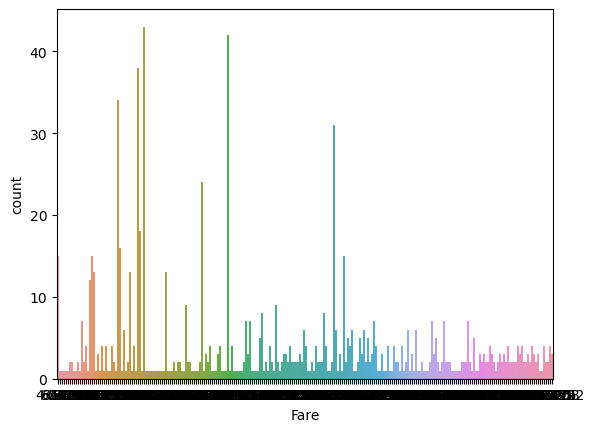

--- Embarked ---
S: 644 (72.28%)
C: 168 (18.86%)
Q: 77 (8.64%)
Unknown: 2 (0.22%)


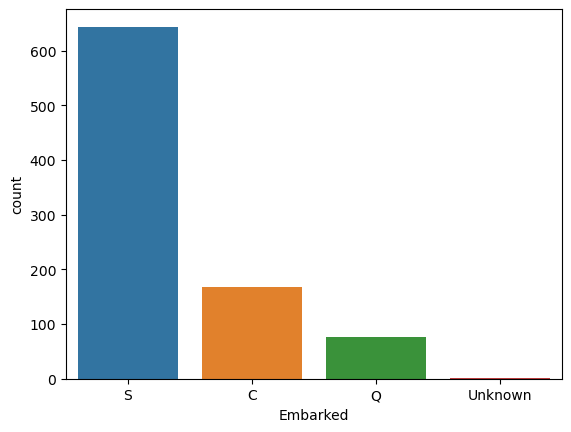

In [189]:
# qualitative_vars = data.select_dtypes(include='object')
for column in data.columns:
    print(f"--- {column} ---")
    value_counts = data[column].value_counts()
    total = len(data[column])
    
    # Affichage des comptages et des pourcentages
    for value, count in value_counts.items():
        percentage = (count / total) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")
    
    sns.countplot(x=column, data=data)
    plt.show()

## 3. Décrire et représenter graphiquement les deux sous-populations (Hommes et Femmes) suivant chaque feature

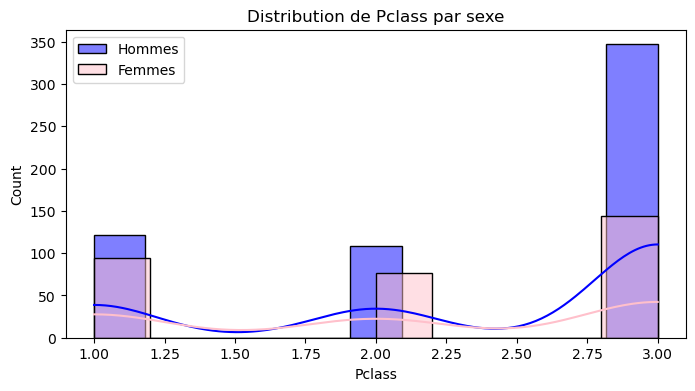

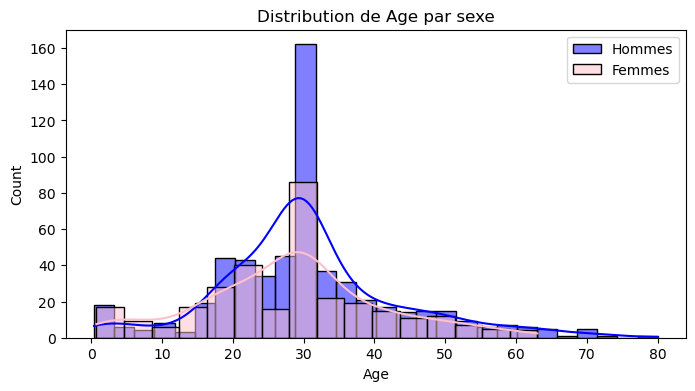

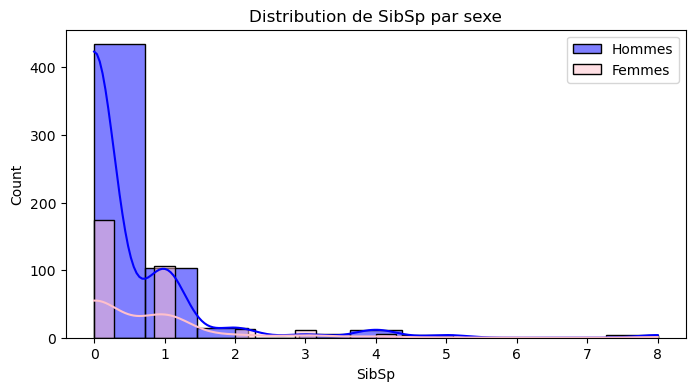

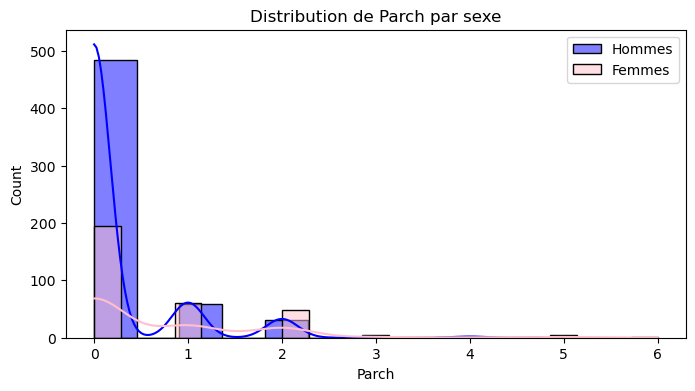

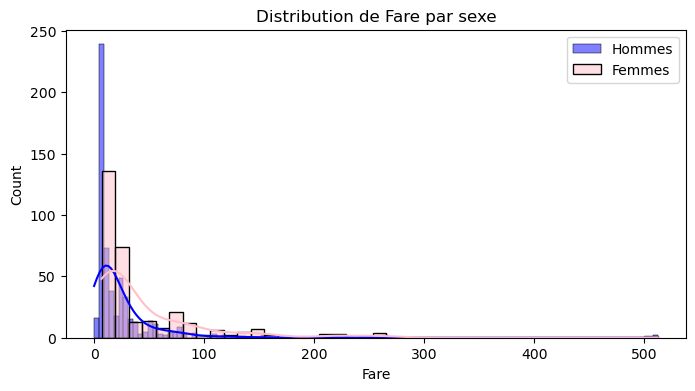

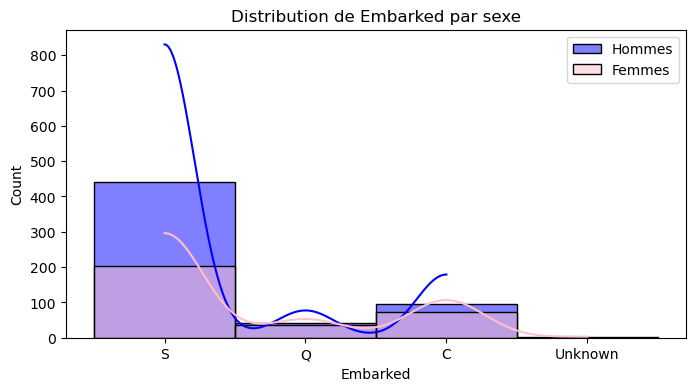

In [190]:
gender_features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked"]

for feature in gender_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data[data["Sex"] == "male"], x=feature, label="Hommes", color="blue", kde=True)
    sns.histplot(data=data[data["Sex"] == "female"], x=feature, label="Femmes", color="pink", kde=True)
    plt.legend()
    plt.title(f"Distribution de {feature} par sexe")
    plt.show()

## 4. Calculer et représenter graphiquement la matrice de corrélation

In [195]:
# Créez un encodeur LabelEncoder
label_encoder = LabelEncoder()

# Encodez la variable "Sex" en 0 et 1
data = label_encoder.fit_transform(data)

# Exclure la colonne "Sex" du calcul de la matrice de corrélation
corr_matrix = data.drop("Sex", axis=1).corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

ValueError: y should be a 1d array, got an array of shape (891, 8) instead.

## 5. Réservez 25% des exemples pour le test et 75% pour l'apprentissage avec une graine = 42

In [192]:
X = data.drop("Sex", axis=1)
y = data["Sex"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 6. Apprendre les exemples du train à l'aide des algorithmes suivants : DecisionTree, RandomForest et KNN

In [193]:
classifiers = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'S'